In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

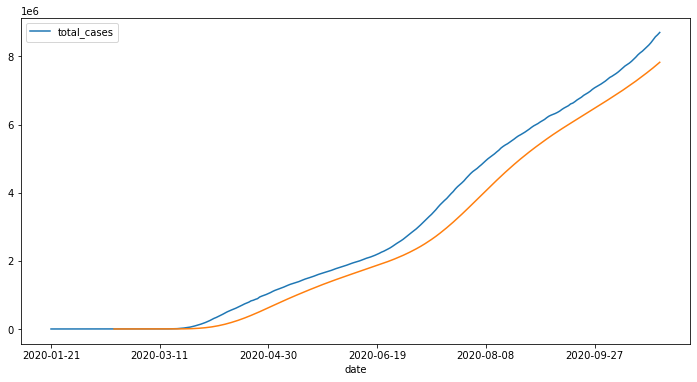

In [2]:
# Import Our World in Data CSV
# https://github.com/owid/covid-19-data/tree/master/public/data
owid_df = pd.read_csv('Datasets/owid-covid-data.csv')

owid_df.columns # Show all columns

# Create Numpy array of unique countries
country_df = owid_df.location.unique()
country_df # Show countries
country_df.size # How many countries (214)

# Get indexes for location rows equal to United States
indexer = owid_df[owid_df['location']=='United States'].index
# Get dataframe location and total cases for United States
us_tc = owid_df.loc[indexer, 'date':'total_cases']
# Delete NaN values
us_tc = us_tc.dropna()
# Set date as index
us_tc.set_index('date', inplace=True)
us_tc.plot(figsize=(12,6))

# Plot a 30 day moving average
us_tc.rolling(window=30).mean()['total_cases'].plot()

# owid_df.columns
# country_df

Index(['new_cases_per_million'], dtype='object')
Index(['new_cases_per_million'], dtype='object')


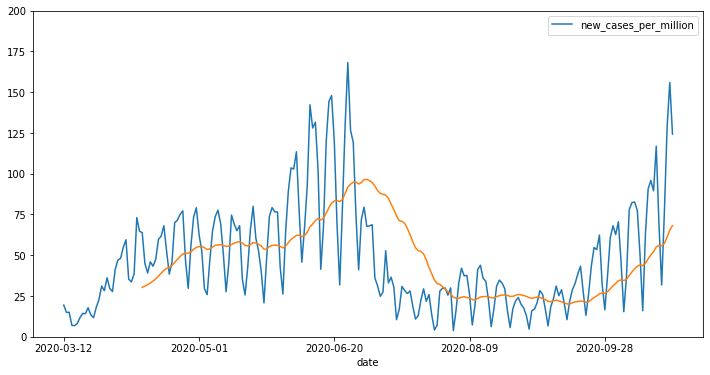

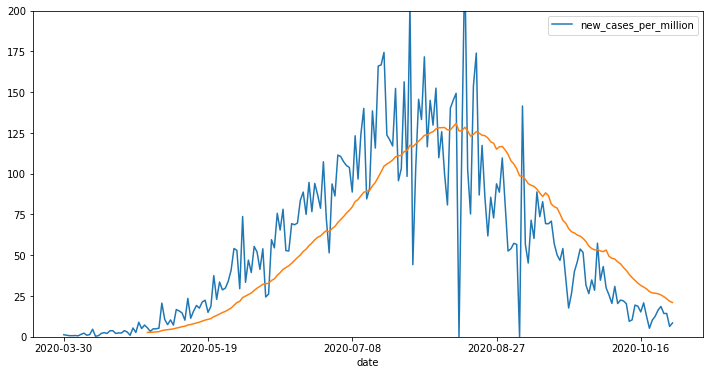

In [3]:
# Lockdowns

def plot_covid_data(country, col, plot_ma=False, y_max=200):
    # Get indexes for location rows equal to country name
    indexer = owid_df[owid_df['location']==country].index
    # Get dataframe location and column data for country name
    country_df = owid_df.loc[indexer, 'date':col]
    # Delete NaN values
    country_df = country_df.dropna()
    # Set date as index
    country_df.set_index('date', inplace=True)
    # Remove all columns except for what I want
    country_df.drop(country_df.columns.difference([col]), 1, inplace=True)
    country_df.plot(figsize=(12,6), ylim=[0,y_max])

    # Plot moving average if requested
    if plot_ma:
        # Plot a 30 day moving average
        country_df.rolling(window=30).mean()[col].plot()
    print(country_df.columns)
    
# Least restrictive lockdown
plot_covid_data('Sweden', 'new_cases_per_million', True)
# Most restrictive lockdown measures
plot_covid_data('Bolivia', 'new_cases_per_million', True) 

# owid_df.columns

Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')


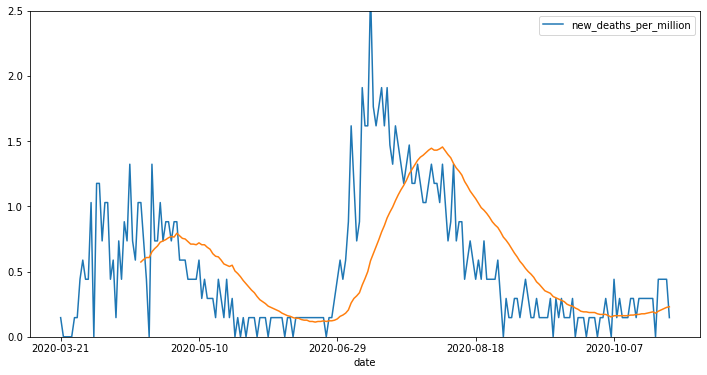

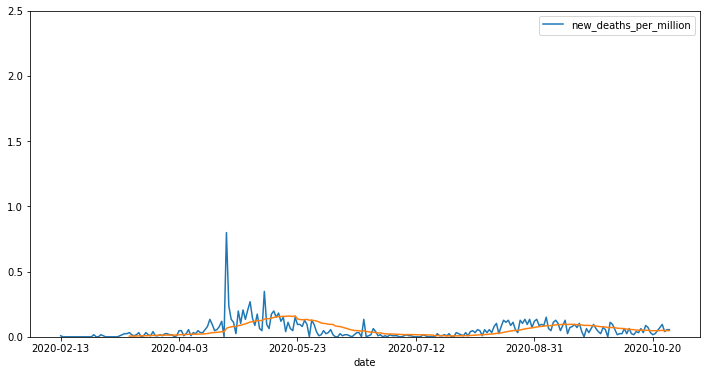

In [4]:
# Median age vs Death Rate

# Country with lowest median age
plot_covid_data('Serbia', 'new_deaths_per_million', True, 2.5)
# Country with highest median age
plot_covid_data('Japan', 'new_deaths_per_million', True, 2.5)

Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')


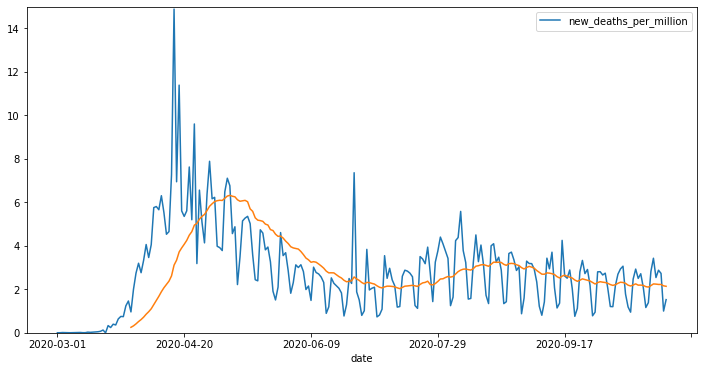

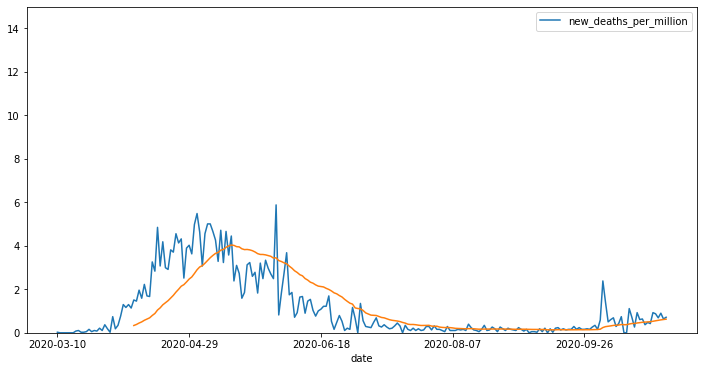

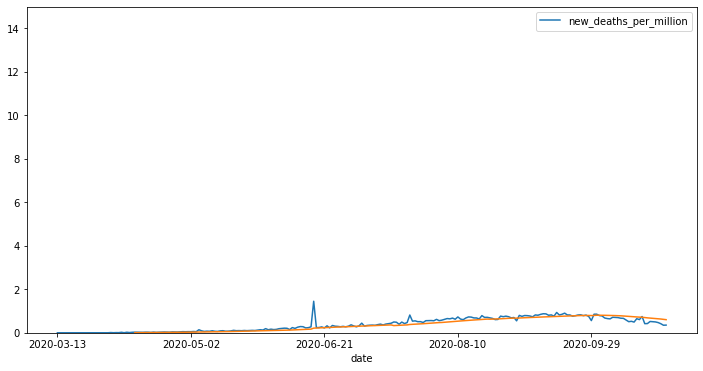

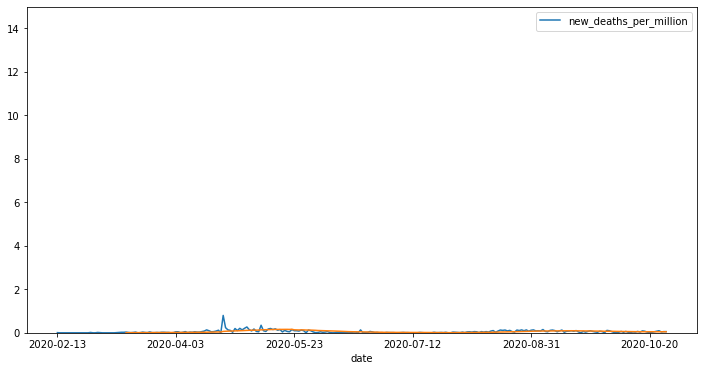

In [5]:
# Obesity vs Death Rate

# Countries with highest percentages 
plot_covid_data('United States', 'new_deaths_per_million', True, 15)
plot_covid_data('Canada', 'new_deaths_per_million', True, 15)
# 2 countries with lowest percentages
plot_covid_data('India', 'new_deaths_per_million', True, 15)
plot_covid_data('Japan', 'new_deaths_per_million', True, 15)

Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')


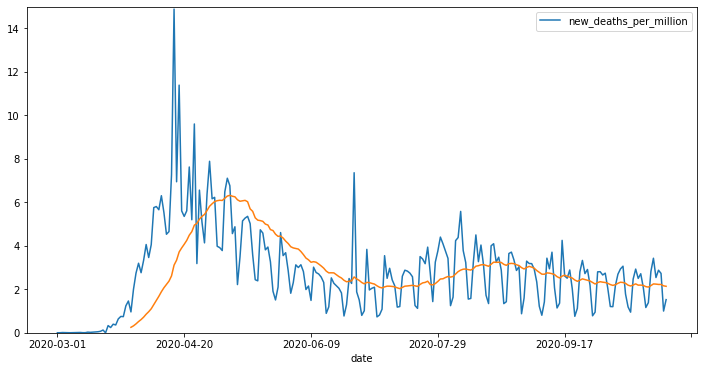

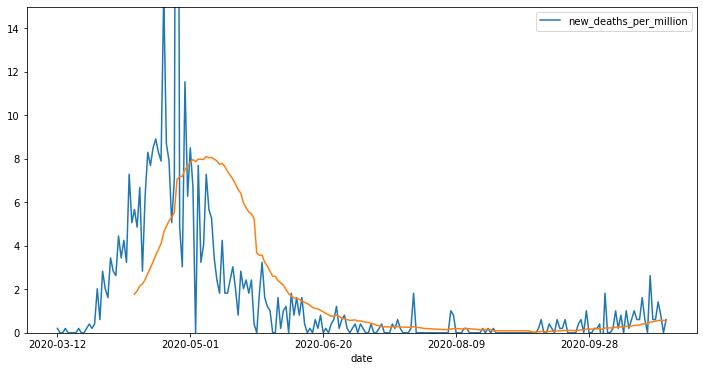

In [6]:
# Diabetes Prevalance vs Death Rate

# Country with highest percentage 
plot_covid_data('United States', 'new_deaths_per_million', True, 15)
# Country with lowest percentage
plot_covid_data('Ireland', 'new_deaths_per_million', True, 15)

Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')


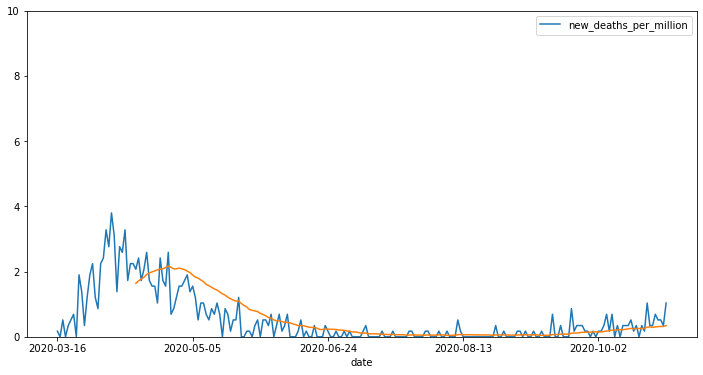

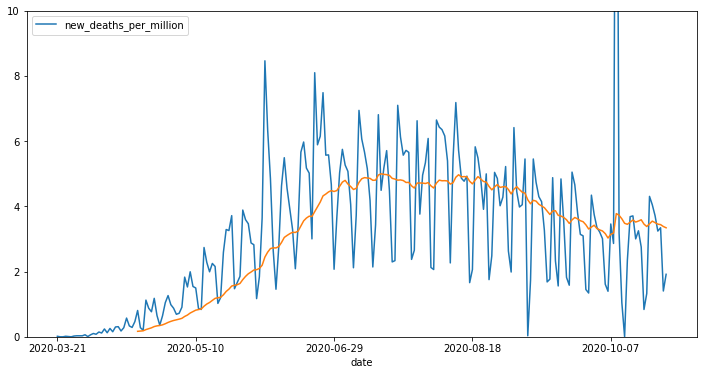

In [7]:
# Testing vs Death Rate

# Country with highest percentage 
plot_covid_data('Denmark', 'new_deaths_per_million', True, 10)
# Country with lowest percentage
plot_covid_data('Mexico', 'new_deaths_per_million', True, 10)

In [10]:
def scatter_plot(date, col1, col2):
    tot_df = pd.DataFrame(columns = ['date', 'location', col1, col2])
    for c in country_df:
        temp_df = owid_df[(owid_df['location']==c) & (owid_df['date']==date)][['date', 'location', col1, col2]]
        tot_df = tot_df.append(temp_df, ignore_index = True).fillna(0)
    tot_df.set_index('date', inplace=True)
    
    fig = px.scatter(data_frame=tot_df, x=col2, 
                     y=col1, color="location", trendline="ols",
                 hover_data=['location'])
    fig.show()
    
    return tot_df

scatter_plot('2020-10-27', 'total_deaths_per_million', 'aged_65_older')

,location,total_deaths_per_million,aged_65_older
date,,,
2020-10-27,Aruba,337.186,13.085
2020-10-27,Afghanistan,39.097,2.581
2020-10-27,Angola,8.154,2.405
2020-10-27,Anguilla,0.000,0.000
2020-10-27,Albania,166.794,13.188
...,...,...,...
2020-10-27,South Africa,320.493,5.344
2020-10-27,Zambia,18.930,2.480
2020-10-27,Zimbabwe,16.282,2.822


In [9]:
owid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [11]:
scatter_plot('2020-10-27', 'total_deaths_per_million', 'handwashing_facilities')

,location,total_deaths_per_million,handwashing_facilities
date,,,
2020-10-27,Aruba,337.186,0.000
2020-10-27,Afghanistan,39.097,37.746
2020-10-27,Angola,8.154,26.664
2020-10-27,Anguilla,0.000,0.000
2020-10-27,Albania,166.794,0.000
...,...,...,...
2020-10-27,South Africa,320.493,43.993
2020-10-27,Zambia,18.930,13.938
2020-10-27,Zimbabwe,16.282,36.791


In [12]:
scatter_plot('2020-10-27', 'total_deaths_per_million', 'human_development_index')

,location,total_deaths_per_million,human_development_index
date,,,
2020-10-27,Aruba,337.186,0.000
2020-10-27,Afghanistan,39.097,0.498
2020-10-27,Angola,8.154,0.581
2020-10-27,Anguilla,0.000,0.000
2020-10-27,Albania,166.794,0.785
...,...,...,...
2020-10-27,South Africa,320.493,0.699
2020-10-27,Zambia,18.930,0.588
2020-10-27,Zimbabwe,16.282,0.535


In [13]:
scatter_plot('2020-10-27', 'total_deaths_per_million', 'male_smokers')

,location,total_deaths_per_million,male_smokers
date,,,
2020-10-27,Aruba,337.186,0.000
2020-10-27,Afghanistan,39.097,0.000
2020-10-27,Angola,8.154,0.000
2020-10-27,Anguilla,0.000,0.000
2020-10-27,Albania,166.794,51.200
...,...,...,...
2020-10-27,South Africa,320.493,33.200
2020-10-27,Zambia,18.930,24.700
2020-10-27,Zimbabwe,16.282,30.700


In [14]:
scatter_plot('2020-10-27', 'total_deaths_per_million', 'female_smokers')

,location,total_deaths_per_million,female_smokers
date,,,
2020-10-27,Aruba,337.186,0.000
2020-10-27,Afghanistan,39.097,0.000
2020-10-27,Angola,8.154,0.000
2020-10-27,Anguilla,0.000,0.000
2020-10-27,Albania,166.794,7.100
...,...,...,...
2020-10-27,South Africa,320.493,8.100
2020-10-27,Zambia,18.930,3.100
2020-10-27,Zimbabwe,16.282,1.600


In [15]:
scatter_plot('2020-10-27', 'total_deaths_per_million', 'total_cases_per_million')

,location,total_deaths_per_million,total_cases_per_million
date,,,
2020-10-27,Aruba,337.186,41398.947
2020-10-27,Afghanistan,39.097,1054.039
2020-10-27,Angola,8.154,285.429
2020-10-27,Anguilla,0.000,199.973
2020-10-27,Albania,166.794,6756.898
...,...,...,...
2020-10-27,South Africa,320.493,12085.227
2020-10-27,Zambia,18.930,881.203
2020-10-27,Zimbabwe,16.282,558.638
